In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
import numpy as np

## Experiment 1

In [2]:
initial = pd.read_csv('initial_results_16conditions.csv')

In [3]:
initial.rename(columns = {'Prev.Length': 'prev_length', 
                          'Browse.Time': 'browse_time',
                          'Match.Score': 'match_score',
                          'Tile.Size': 'tile_size',
                          'Prev.Type': 'prev_type'}, inplace=True)

In [4]:
# Overall Average Browsing Time
initial['browse_time'].mean()

20.34286583848096

In [5]:
initial.groupby(['prev_length', 'match_score', 'tile_size', 'prev_type']).mean('browse_time')

browse_time
prev_length match_score tile_size prev_type             
30          50          0.1       AC           21.905830
                                  TT           17.002278
                        0.5       AC           21.970289
                                  TT           17.021784
            100         0.1       AC           21.844452
                                  TT           16.750392
                        0.5       AC           21.899821
                                  TT           16.878857
120         50          0.1       AC           22.517516
                                  TT           17.709295
                        0.5       AC           22.668150
                                  TT           17.510107
            100         0.1       AC           24.960944
                                  TT           19.996995
                        0.5       AC           24.866526
                                  TT           19.982616

In [6]:
full_model = smf.ols('browse_time ~ prev_length * match_score * tile_size * C(prev_type)',\
            data=initial).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            browse_time   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     837.4
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:39:10   Log-Likelihood:                -2251.9
No. Observations:                1600   AIC:                             4536.
Df Residuals:                    1584   BIC:                             4622.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               22.6067      0.389     58.081      0.000      21.843      23.370
C(prev_type)[T.TT]                                      -4.7439      0.550     -8.618      0.000      -5.824      -3.664
prev_length                                             -0.0219      0.004     -4.928      0.000      -0.031      -0.013
prev_length:C(prev_type)[T.TT]                           0.0024      0.006      0.379      0.705      -0.010       0.015
match_score                                             -0.0183      0.005     -3.712      0.000      -0.028      -0.009
match_score:C(prev_type)[T.TT]                          -0.0041      0.007     -0.591      0.555      -0.018       0.010
prev_length:match_score                                  0.0006   5.63e-05     10.121      0.000       0.000       0.001
prev_length:match_score:C(prev_type)[T.TT]           -9.594e-06   7.96e-05     -0.121      0.904      -0.000       0.000
tile_size                                               -0.0846      1.080     -0.078      0.938      -2.202       2.033
tile_size:C(prev_type)[T.TT]                             0.1064      1.527      0.070      0.944      -2.888       3.101
prev_length:tile_size                                    0.0089      0.012      0.725      0.469      -0.015       0.033
prev_length:tile_size:C(prev_type)[T.TT]                -0.0171      0.017     -0.981      0.327      -0.051       0.017
match_score:tile_size                                    0.0035      0.014      0.255      0.799      -0.023       0.030
match_score:tile_size:C(prev_type)[T.TT]                 0.0007      0.019      0.037      0.971      -0.037       0.039
prev_length:match_score:tile_size                       -0.0001      0.000     -0.840      0.401      -0.000       0.000
prev_length:match_score:tile_size:C(prev_type)[T.TT]     0.0002      0.000      0.785      0.433      -0.000       0.001
==============================================================================
Omnibus:                        1.254   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.534   Jarque-Bera (JB):                1.156
Skew:                           0.056   Prob(JB):                        0.561
Kurtosis:                       3.069   Cond. No.                     6.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
reduced_model1 = smf.ols('browse_time ~ prev_length + match_score + C(prev_type) + prev_length:match_score',\
            data=initial).fit()
reduced_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            browse_time   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     3149.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:39:10   Log-Likelihood:                -2255.0
No. Observations:                1600   AIC:                             4520.
Df Residuals:                    1595   BIC:                             4547.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  22.7117      0.154    147.062      0.000      22.409      23.015
C(prev_type)[T.TT]         -4.9727      0.050   -100.254      0.000      -5.070      -4.875
prev_length                -0.0206      0.002    -11.833      0.000      -0.024      -0.017
match_score                -0.0192      0.002     -9.948      0.000      -0.023      -0.015
prev_length:match_score     0.0006    2.2e-05     25.022      0.000       0.001       0.001
==============================================================================
Omnibus:                        1.075   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                0.976
Skew:                           0.048   Prob(JB):                        0.614
Kurtosis:                       3.074   Cond. No.                     4.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Browsing Time')

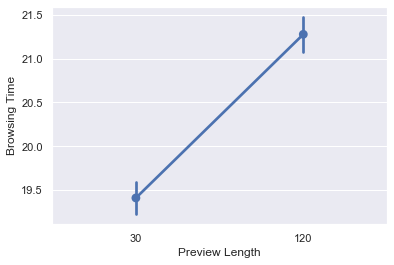

In [8]:
sns.set_theme(style="darkgrid")
fig34 = sns.pointplot(x="prev_length", y="browse_time", data=initial)
fig34.set_xlabel("Preview Length")
fig34.set_ylabel("Browsing Time")

Text(0, 0.5, 'Browsing Time')

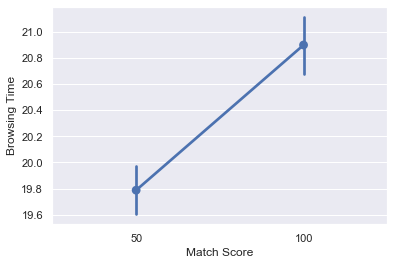

In [9]:
sns.set_theme(style="darkgrid")
fig34 = sns.pointplot(x="match_score", y="browse_time", data=initial)
fig34.set_xlabel("Match Score")
fig34.set_ylabel("Browsing Time")

Text(0, 0.5, 'Browsing Time')

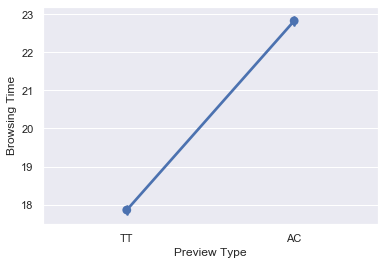

In [10]:
sns.set_theme(style="darkgrid")
fig34 = sns.pointplot(x="prev_type", y="browse_time", data=initial)
fig34.set_xlabel("Preview Type")
fig34.set_ylabel("Browsing Time")

Text(0, 0.5, 'Browsing Time')

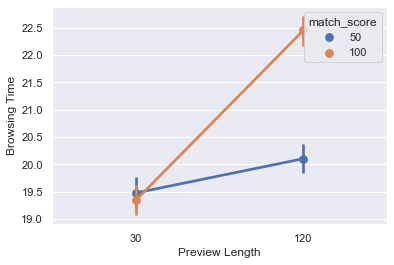

In [11]:
sns.set_theme(style="darkgrid")
fig34 = sns.pointplot(x="prev_length", hue="match_score", y="browse_time", data=initial)
fig34.set_xlabel("Preview Length")
fig34.set_ylabel("Browsing Time")

Text(0, 0.5, 'Browsing Time')

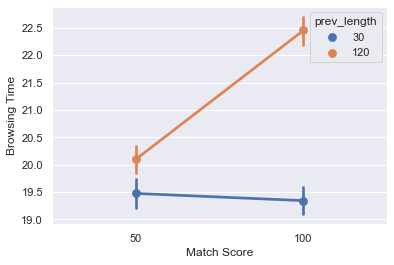

In [12]:
sns.set_theme(style="darkgrid")
fig34 = sns.pointplot(x="match_score", hue="prev_length", y="browse_time", data=initial)
fig34.set_xlabel("Match Score")
fig34.set_ylabel("Browsing Time")

## Experiment 2 

In [13]:
results2 = pd.read_csv('results_experiment2.csv')
results2.head()

,Prev.Length,Match.Score,Prev.Type,Tile.Size,Browse.Time
0,45,50,TT,0.2,15.768540
1,90,50,TT,0.2,15.564187
2,45,75,TT,0.2,11.145504
3,90,75,TT,0.2,12.435256
4,45,50,TT,0.2,15.660411


In [14]:
results2.rename(columns = {'Prev.Length': 'prev_length', 
                          'Browse.Time': 'browse_time',
                          'Match.Score': 'match_score',
                          'Tile.Size': 'tile_size',
                          'Prev.Type': 'prev_type'}, inplace=True)

In [15]:
results2.head()

,prev_length,match_score,prev_type,tile_size,browse_time
0,45,50,TT,0.2,15.768540
1,90,50,TT,0.2,15.564187
2,45,75,TT,0.2,11.145504
3,90,75,TT,0.2,12.435256
4,45,50,TT,0.2,15.660411


In [16]:
results2['browse_time'].mean()

14.469728740157246

In [17]:
results2.groupby(['prev_length', 'match_score']).mean('browse_time')

tile_size  browse_time
prev_length match_score                        
45          50                 0.2    17.100322
            75                 0.2    12.365192
90          50                 0.2    15.647742
            75                 0.2    12.765659

In [18]:
full_model2 = smf.ols('browse_time ~ prev_length * match_score',\
            data=results2).fit()
full_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            browse_time   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     603.7
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          2.65e-147
Time:                        21:39:12   Log-Likelihood:                -536.23
No. Observations:                 400   AIC:                             1080.
Df Residuals:                     396   BIC:                             1096.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  31.7293      0.749     42.350      0.000      30.256      33.202
prev_length                -0.1146      0.011    -10.887      0.000      -0.135      -0.094
match_score                -0.2635      0.012    -22.419      0.000      -0.287      -0.240
prev_length:match_score     0.0016      0.000      9.970      0.000       0.001       0.002
==============================================================================
Omnibus:                        1.801   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.567
Skew:                           0.136   Prob(JB):                        0.457
Kurtosis:                       3.141   Cond. No.                     7.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Browsing Time')

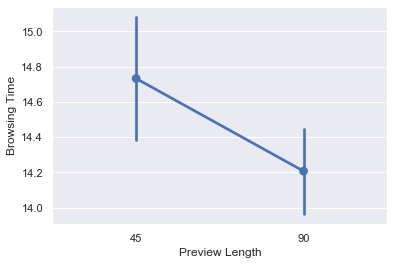

In [19]:
sns.set_theme(style="darkgrid")
fig34 = sns.pointplot(x="prev_length", y="browse_time", data=results2)
fig34.set_xlabel("Preview Length")
fig34.set_ylabel("Browsing Time")

Text(0, 0.5, 'Browsing Time')

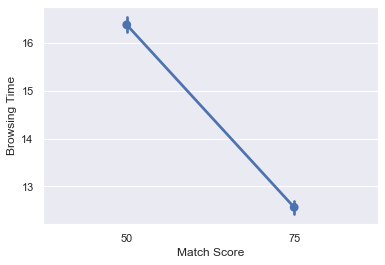

In [20]:
sns.set_theme(style="darkgrid")
fig34 = sns.pointplot(x="match_score", y="browse_time", data=results2)
fig34.set_xlabel("Match Score")
fig34.set_ylabel("Browsing Time")

Text(0, 0.5, 'Browsing Time')

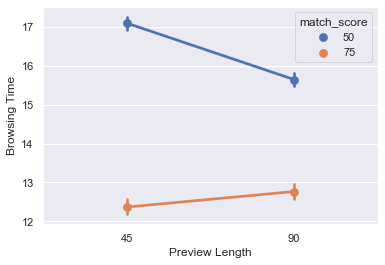

In [21]:
sns.set_theme(style="darkgrid")
fig34 = sns.pointplot(x="prev_length", hue="match_score", y="browse_time", data=results2)
fig34.set_xlabel("Preview Length")
fig34.set_ylabel("Browsing Time")

Text(0, 0.5, 'Browsing Time')

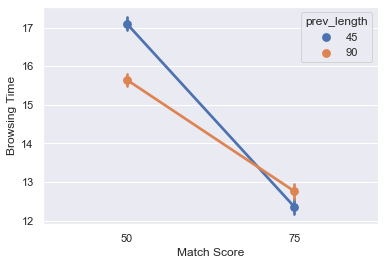

In [22]:
sns.set_theme(style="darkgrid")
fig34 = sns.pointplot(hue="prev_length", x="match_score", y="browse_time", data=results2)
fig34.set_xlabel("Match Score")
fig34.set_ylabel("Browsing Time")

## Experiment 3

In [23]:
results3 = pd.read_csv('results_experiment3.csv')
results3.head()

,Prev.Length,Match.Score,Prev.Type,Tile.Size,Browse.Time
0,60,70,TT,0.2,12.500038
1,75,70,TT,0.2,11.076440
2,60,80,TT,0.2,13.788207
3,75,80,TT,0.2,10.202210
4,60,70,TT,0.2,11.872554


In [24]:
results3.rename(columns = {'Prev.Length': 'prev_length', 
                          'Browse.Time': 'browse_time',
                          'Match.Score': 'match_score',
                          'Tile.Size': 'tile_size',
                          'Prev.Type': 'prev_type'}, inplace=True)

In [25]:
results3.groupby(['prev_length', 'match_score']).mean('browse_time')

tile_size  browse_time
prev_length match_score                        
60          70                 0.2    12.132682
            80                 0.2    11.541458
75          70                 0.2    10.278909
            80                 0.2    10.546854

In [26]:
results3['browse_time'].mean()

11.124975596665944

In [27]:
full_model3 = smf.ols('browse_time ~ prev_length * match_score',\
            data=results3).fit()
full_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            browse_time   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     76.67
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           4.05e-39
Time:                        21:39:13   Log-Likelihood:                -560.18
No. Observations:                 400   AIC:                             1128.
Df Residuals:                     396   BIC:                             1144.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  47.7431      6.716      7.109      0.000      34.540      60.946
prev_length                -0.5245      0.099     -5.305      0.000      -0.719      -0.330
match_score                -0.4028      0.089     -4.508      0.000      -0.578      -0.227
prev_length:match_score     0.0057      0.001      4.354      0.000       0.003       0.008
==============================================================================
Omnibus:                        1.267   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                1.282
Skew:                           0.063   Prob(JB):                        0.527
Kurtosis:                       2.753   Cond. No.                     6.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Browsing Time')

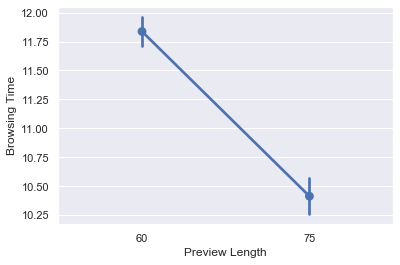

In [28]:
sns.set_theme(style="darkgrid")
fig34 = sns.pointplot(x="prev_length", y="browse_time", data=results3)
fig34.set_xlabel("Preview Length")
fig34.set_ylabel("Browsing Time")

Text(0, 0.5, 'Browsing Time')

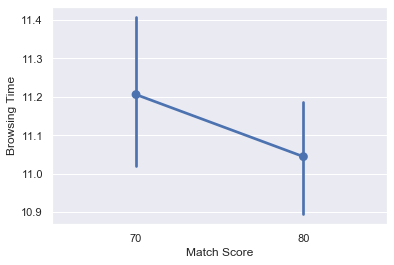

In [29]:
sns.set_theme(style="darkgrid")
fig34 = sns.pointplot(x="match_score", y="browse_time", data=results3)
fig34.set_xlabel("Match Score")
fig34.set_ylabel("Browsing Time")

Text(0, 0.5, 'Browsing Time')

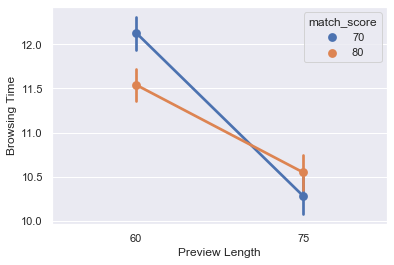

In [30]:
sns.set_theme(style="darkgrid")
fig34 = sns.pointplot(x="prev_length", hue="match_score", y="browse_time", data=results3)
fig34.set_xlabel("Preview Length")
fig34.set_ylabel("Browsing Time")

In [31]:
# 80 

Text(0, 0.5, 'Browsing Time')

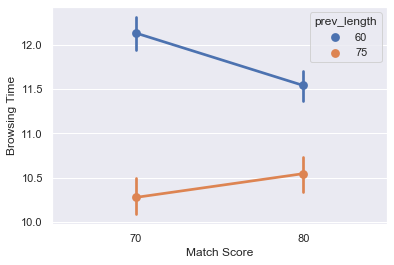

In [32]:
sns.set_theme(style="darkgrid")
fig34 = sns.pointplot(hue="prev_length", x="match_score", y="browse_time", data=results3)
fig34.set_xlabel("Match Score")
fig34.set_ylabel("Browsing Time")

## Experiment 4

In [33]:
results4 = pd.read_csv('results_experiment4.csv')

In [34]:
results4.rename(columns = {'Prev.Length': 'prev_length', 
                          'Browse.Time': 'browse_time',
                          'Match.Score': 'match_score',
                          'Tile.Size': 'tile_size',
                          'Prev.Type': 'prev_type'}, inplace=True)

In [35]:
results4['browse_time'].mean()

10.749833511280544

In [36]:
results3.groupby(['prev_length', 'match_score']).mean('browse_time')

tile_size  browse_time
prev_length match_score                        
60          70                 0.2    12.132682
            80                 0.2    11.541458
75          70                 0.2    10.278909
            80                 0.2    10.546854

In [37]:
results4.groupby(['prev_length', 'match_score']).mean('browse_time')

tile_size  browse_time
prev_length match_score                        
70          70                 0.2    10.574519
            80                 0.2    10.697979
80          70                 0.2    10.499554
            80                 0.2    11.227282

In [38]:
full_model4 = smf.ols('browse_time ~ prev_length * match_score',\
            data=results4).fit()
full_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            browse_time   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     10.41
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           1.31e-06
Time:                        21:39:14   Log-Likelihood:                -572.87
No. Observations:                 400   AIC:                             1154.
Df Residuals:                     396   BIC:                             1170.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  39.8442     11.508      3.462      0.001      17.219      62.469
prev_length                -0.4305      0.153     -2.812      0.005      -0.731      -0.129
match_score                -0.4106      0.153     -2.682      0.008      -0.712      -0.110
prev_length:match_score     0.0060      0.002      2.967      0.003       0.002       0.010
==============================================================================
Omnibus:                        0.757   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.543
Skew:                          -0.046   Prob(JB):                        0.762
Kurtosis:                       3.155   Cond. No.                     1.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  Experiment 5

In [39]:
results5 = pd.read_csv('results_experiment5.csv')

In [40]:
results5.rename(columns = {'Prev.Length': 'prev_length', 
                          'Browse.Time': 'browse_time',
                          'Match.Score': 'match_score',
                          'Tile.Size': 'tile_size',
                          'Prev.Type': 'prev_type'}, inplace=True)

In [41]:
results5['browse_time'].mean()

10.250638271351816

In [42]:
results5.groupby(['match_score']).mean('browse_time')

,prev_length,tile_size,browse_time
match_score,,,
70,75.0,0.2,10.336880
75,75.0,0.2,10.164397


In [43]:
full_model5 = smf.ols('browse_time ~ match_score',\
            data=results5).fit()
full_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            browse_time   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.315
Date:                Wed, 19 Jan 2022   Prob (F-statistic):              0.253
Time:                        21:39:14   Log-Likelihood:                -295.13
No. Observations:                 200   AIC:                             594.3
Df Residuals:                     198   BIC:                             600.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.7516      2.182      5.843      0.000       8.448      17.055
match_score    -0.0345      0.030     -1.147      0.253      -0.094       0.025
==============================================================================
Omnibus:                        0.537   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.765   Jarque-Bera (JB):                0.670
Skew:                           0.056   Prob(JB):                        0.715
Kurtosis:                       2.740   Cond. No.                     2.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Experiment 6

In [44]:
results6 = pd.read_csv('results_experiment6.csv')

In [45]:
results6.rename(columns = {'Prev.Length': 'prev_length', 
                          'Browse.Time': 'browse_time',
                          'Match.Score': 'match_score',
                          'Tile.Size': 'tile_size',
                          'Prev.Type': 'prev_type'}, inplace=True)

In [46]:
results6['browse_time'].mean()

10.171588243389056

In [47]:
results6.groupby(['match_score']).mean('browse_time')

,prev_length,tile_size,browse_time
match_score,,,
73,75.0,0.2,10.157223
75,75.0,0.2,10.185953


In [48]:
full_model6 = smf.ols('browse_time ~ match_score',\
            data=results6).fit()
full_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            browse_time   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.03927
Date:                Wed, 19 Jan 2022   Prob (F-statistic):              0.843
Time:                        21:39:14   Log-Likelihood:                -287.75
No. Observations:                 200   AIC:                             579.5
Df Residuals:                     198   BIC:                             586.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.1086      5.365      1.698      0.091      -1.471      19.688
match_score     0.0144      0.072      0.198      0.843      -0.129       0.157
==============================================================================
Omnibus:                        5.347   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.055
Skew:                          -0.382   Prob(JB):                       0.0799
Kurtosis:                       3.155   Cond. No.                     5.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Experiment 7

In [49]:
results7 = pd.read_csv('results_experiment7.csv')

In [50]:
results7.rename(columns = {'Prev.Length': 'prev_length', 
                          'Browse.Time': 'browse_time',
                          'Match.Score': 'match_score',
                          'Tile.Size': 'tile_size',
                          'Prev.Type': 'prev_type'}, inplace=True)

In [51]:
results7['browse_time'].mean()

12.548677745947

In [52]:
results7.groupby(['prev_type']).mean('browse_time')

,prev_length,match_score,tile_size,browse_time
prev_type,,,,
AC,75.0,75.0,0.2,14.937499
TT,75.0,75.0,0.2,10.159857


In [53]:
tt = results7.loc[results7['prev_type'] == 'TT', 'browse_time']
ac = results7.loc[results7['prev_type'] == 'AC', 'browse_time']

# F-test for variance
t = np.var(tt, ddof = 1)/np.var(ac, ddof = 1)
print("t =", t)
pv = stats.f.cdf(t, dfn=len(tt)-1, dfd=len(ac)-1) + 1 - stats.f.cdf(1/t, dfn=len(tt)-1, dfd=len(ac)-1)
print("p-value =", pv)   # use student's t
print()

# Student's T-test for mean
t, pv = stats.ttest_ind(tt, ac, equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv) # small p-value so we reject the null and accept that "tt" has lower average browse time than "ac"

t = 0.9893162169472836
p-value = 0.9574911126783264

t = -33.23039374084072
p-value = 3.178820666391018e-83


In [54]:
full_model7 = smf.ols('browse_time ~ C(prev_type)',\
            data=results7).fit()
full_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            browse_time   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1104.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           6.36e-83
Time:                        21:39:14   Log-Likelihood:                -286.08
No. Observations:                 200   AIC:                             576.2
Df Residuals:                     198   BIC:                             582.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             14.9375      0.102    146.931      0.000      14.737      15.138
C(prev_type)[T.TT]    -4.7776      0.144    -33.230      0.000      -5.061      -4.494
==============================================================================
Omnibus:                        2.387   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                2.402
Skew:                          -0.222   Prob(JB):                        0.301
Kurtosis:                       2.699   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Results Analysis

In [55]:
full_results = pd.concat([initial, results2, results3, results4, results5, results6, results7])

In [56]:
full_results.groupby(['prev_length', 'match_score', 'prev_type']).mean('browse_time')

tile_size  browse_time
prev_length match_score prev_type                        
30          50          AC               0.3    21.938060
                        TT               0.3    17.012031
            100         AC               0.3    21.872137
                        TT               0.3    16.814625
45          50          TT               0.2    17.100322
            75          TT               0.2    12.365192
60          70          TT               0.2    12.132682
            80          TT               0.2    11.541458
70          70          TT               0.2    10.574519
            80          TT               0.2    10.697979
75          70          TT               0.2    10.307894
            73          TT               0.2    10.157223
            75          AC               0.2    14.937499
                        TT               0.2    10.170069
            80          TT               0.2    10.546854
80          70          TT               0.2    10.499554
            80          TT               0.2    11.227282
90          50          TT               0.2    15.647742
            75          TT               0.2    12.765659
120         50          AC               0.3    22.592833
                        TT               0.3    17.609701
            100         AC               0.3    24.913735
                        TT               0.3    19.989806

In [57]:
optimal_config = results7[results7['prev_type']=='TT']['browse_time']

In [58]:
optimal_config

1      10.514514
3      10.515766
5      10.764637
7       7.609386
9      11.305271
         ...    
191    10.467331
193     9.951396
195     9.265071
197     9.415095
199    10.508503
Name: browse_time, Length: 100, dtype: float64

In [59]:
optimal_config.shape

(100,)

In [60]:
sample_mean = optimal_config.mean()
n = 100

In [61]:
t_score = stats.t.ppf(q=1-.05/2,df=99)
t_score

1.9842169515086827

In [62]:
right = sample_mean + t_score*np.sqrt(np.var(optimal_config)/n)
left = sample_mean - t_score*np.sqrt(np.var(optimal_config)/n)

In [63]:
print(left, right)

9.959686079756745 10.360027486641547


In [64]:
full_results

,prev_length,match_score,tile_size,prev_type,browse_time
0,30,50,0.1,TT,17.443942
1,120,50,0.1,TT,17.673795
2,30,100,0.1,TT,16.870164
3,120,100,0.1,TT,19.579138
4,30,50,0.5,TT,16.311672
...,...,...,...,...,...
195,75,75,0.2,TT,9.265071
196,75,75,0.2,AC,14.879259
197,75,75,0.2,TT,9.415095
198,75,75,0.2,AC,15.994259


# ADD

In [65]:
new = full_results.copy()
new = new.drop(columns=['match_score','tile_size'])
new = new[new['prev_type']=='TT']
new = new.drop(columns=['prev_type'])
new.prev_length.unique()

array([ 30, 120,  45,  90,  60,  75,  70,  80])

In [66]:
# filter the full_result with prev_length = 75
# get the browse_time in filter data as cond1 
new2 = new.copy()
new3 = new2[new2['prev_length']==75]
new3 = new2.set_index("prev_length")
cond1 = new3.loc[75]
cond1 = cond1.reset_index(drop=False)
cond1 = cond1['browse_time']
cond1

0      11.076440
1      10.202210
2       9.980800
3      10.611147
4      13.405455
         ...    
695    10.467331
696     9.951396
697     9.265071
698     9.415095
699    10.508503
Name: browse_time, Length: 700, dtype: float64

In [67]:
# filter the full_result with prev_length > 75
# get the browse_time in filter data as cond2 
new4 = new2[new2['prev_length']>75]
cond2 = new4.reset_index(drop=False)
cond2 = cond2['browse_time']
cond2

0      17.673795
1      19.579138
2      16.963132
3      19.956732
4      18.353037
         ...    
795    10.596089
796    11.359176
797    12.478433
798    10.601374
799    10.832582
Name: browse_time, Length: 800, dtype: float64

In [68]:
# t-test
def t_test(cond1,cond2,alternative):
    # compare variance 
    F = np.var(cond1,ddof = 1)/np.var(cond2,ddof = 1)
    print(F)
    if F > 1:
        F = 1/F
    pv_F = stats.f.cdf(F,dfn =699,dfd=699)+ 1 - stats.f.cdf(1/F,dfn =799,dfd=799)
    if pv_F < 0.05:
        var_equal = False
    else:
        var_equal = True
    print(var_equal)
    t, pv = stats.ttest_ind(cond1,cond2,equal_var = var_equal,alternative=alternative)
    result = "Reject" if pv < 0.05 else "Fail to reject"
    print("result:", result)
    return t,pv

 $$H_0:\mu_1\geq\mu_2 \text{ vs. }H_A:\mu_1<\mu_2$$

In [69]:
t_result = t_test(cond1,cond2,'less')
t_result

0.0813933097526571
False
result: Reject


(-39.89953540487112, 3.5454991364916305e-205)